# Pre-Task

In [73]:
import numpy as np
import pandas as pd
import random

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
from torch.utils.data import DataLoader,TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import pickle

# Parameters

In [74]:
sequence_length = 10 # 원하는 sequence_length 설정
batch_size = 36 # 원하는 batch_size 설정 >> 6시간 기준
hidden_size = 16 # 원하는 hidden_size 설정
input_size = 11 # 사용하는 feature의 수

# Dataset

In [75]:
# df = pd.read_csv('../../data/Rail_data.csv')
df = pd.read_csv('../../data/Rail_data_split.csv')
df1 = pd.read_csv('../../data/Rail_data_back_split.csv')
# scaler = MinMaxScaler()
# scaled_col = ['air_temp','TSI','azimuth','altitude','solar_rad','High_solar_rad', 'casi', 'humidity', 'rain', 'wind_speed','wind_direction','rail_direction']
# df[scaled_col]= scaler.fit_transform(df[scaled_col])

# scaler1 = MinMaxScaler()
# df['rail_temp'] = scaler1.fit_transform(df['rail_temp'].values.reshape(-1,1))

df = df.astype({'solar_rad': 'float64'})
df = df.astype({'High_solar_rad': 'float64'})
df = df.astype({'casi': 'float64'})
df = df.astype({'humidity': 'float64'})
df = df.astype({'wind_speed': 'float64'})
df = df.drop(['rail_direction'], axis=1)
# int type >> float type

scaler = MinMaxScaler()
scaled_col = ['air_temp','TSI','azimuth','altitude','solar_rad','High_solar_rad', 'casi', 'humidity', 'rain', 'wind_speed','wind_direction']
df[scaled_col]= scaler.fit_transform(df[scaled_col])

scaler1 = MinMaxScaler()
df['rail_temp'] = scaler1.fit_transform(df['rail_temp'].values.reshape(-1,1))

df1 = df1.astype({'solar_rad': 'float64'})
df1 = df1.astype({'High_solar_rad': 'float64'})
df1 = df1.astype({'casi': 'float64'})
df1 = df1.astype({'humidity': 'float64'})
df1 = df1.astype({'wind_speed': 'float64'})
df1 = df1.drop(['rail_direction'], axis=1)
# int type >> float type

scaler2 = MinMaxScaler()
scaled_col = ['air_temp','TSI','azimuth','altitude','solar_rad','High_solar_rad', 'casi', 'humidity', 'rain', 'wind_speed','wind_direction']
df1[scaled_col]= scaler2.fit_transform(df1[scaled_col])

scaler3 = MinMaxScaler()
df1['rail_temp'] = scaler3.fit_transform(df1['rail_temp'].values.reshape(-1,1))


X = df.iloc[:,:11].values
y = df.iloc[:,11].values
X1 = df1.iloc[:,:11].values
y1 = df1.iloc[:,11].values


def sequence_data(X,y, sequence_size): # 원하는 sequence에 따라 데이터 분리
    x_seq = []
    y_seq = []
    for idx in range(len(X) - sequence_size): #len(X)가 7000이고 seq_size가 5라면?
        x_seq.append(X[idx:idx + sequence_size]) # sequence_lengh개씩 특성들을 모두 묶음 >> shape: sequence_length, 11
        y_seq.append(y[idx + sequence_size])     # x에 따른 온도들을 묶음 >> shape: 1, 1
        
    return torch.tensor(x_seq, dtype=torch.float32), torch.tensor(y_seq, dtype=torch.float32).view(-1,1)


X_seq, y_seq = sequence_data(X, y, sequence_length) # 원하는 sequence_length에 따라 데이터 묶기
X1_seq, y1_seq = sequence_data(X1, y1, sequence_length)


X_train, X_test = X_seq[:int(len(X_seq)*0.7)], X_seq[int(len(X_seq)*0.7):]
y_train, y_test = y_seq[:int(len(y_seq)*0.7)], y_seq[int(len(y_seq)*0.7):]
X1_train, X1_test = X1_seq[:int(len(X1_seq)*0.7)], X1_seq[int(len(X1_seq)*0.7):]
y1_train, y1_test = y1_seq[:int(len(y1_seq)*0.7)], y1_seq[int(len(y1_seq)*0.7):]

X_train_cat = torch.cat([X_train, X1_train], dim = 0)
y_train_cat = torch.cat([y_train, y1_train], dim = 0)
X_test_cat = torch.cat([X_test, X1_test], dim = 0)
y_test_cat = torch.cat([y_test, y1_test], dim = 0)

train_DS = TensorDataset(X_train_cat, y_train_cat)
test_DS = TensorDataset(X_test_cat, y_test_cat)

train_DL = DataLoader(train_DS, batch_size = batch_size)
test_DL = DataLoader(test_DS, batch_size = batch_size)
# batch_size에 따라 데이터 처리

In [76]:
# # df = pd.read_csv('../../data/Rail_data.csv')
# df2 = pd.read_csv('../../data/Rail_data.csv')

# # scaler = MinMaxScaler()
# # scaled_col = ['air_temp','TSI','azimuth','altitude','solar_rad','High_solar_rad', 'casi', 'humidity', 'rain', 'wind_speed','wind_direction','rail_direction']
# # df[scaled_col]= scaler.fit_transform(df[scaled_col])

# # scaler1 = MinMaxScaler()
# # df['rail_temp'] = scaler1.fit_transform(df['rail_temp'].values.reshape(-1,1))

# df2 = df2.astype({'solar_rad': 'float64'})
# df2 = df2.astype({'High_solar_rad': 'float64'})
# df2 = df2.astype({'casi': 'float64'})
# df2 = df2.astype({'humidity': 'float64'})
# df2 = df2.astype({'wind_speed': 'float64'})
# df2 = df2.drop(['rail_direction'], axis=1)
# # int type >> float type

# scaler4 = MinMaxScaler()
# scaled_col = ['air_temp','TSI','azimuth','altitude','solar_rad','High_solar_rad', 'casi', 'humidity', 'rain', 'wind_speed']
# df2[scaled_col]= scaler4.fit_transform(df2[scaled_col])

# scaler5 = MinMaxScaler()
# df2['rail_temp'] = scaler5.fit_transform(df2['rail_temp'].values.reshape(-1,1))

# X2 = df2.iloc[:,:11].values
# y2 = df2.iloc[:,11].values


# def sequence_data(X,y, sequence_size): # 원하는 sequence에 따라 데이터 분리
#     x_seq = []
#     y_seq = []
#     for idx in range(len(X) - sequence_size): #len(X)가 7000이고 seq_size가 5라면?
#         x_seq.append(X[idx:idx + sequence_size]) # sequence_lengh개씩 특성들을 모두 묶음 >> shape: sequence_length, 11
#         y_seq.append(y[idx + sequence_size])     # x에 따른 온도들을 묶음 >> shape: 1, 1
        
#     return torch.tensor(x_seq, dtype=torch.float32), torch.tensor(y_seq, dtype=torch.float32).view(-1,1)


# X2_seq, y2_seq = sequence_data(X, y, sequence_length) # 원하는 sequence_length에 따라 데이터 묶기

# X2_train, X2_test = X2_seq[:int(len(X2_seq)*0.7)], X2_seq[int(len(X2_seq)*0.7):]
# y2_train, y2_test = y2_seq[:int(len(y2_seq)*0.7)], y2_seq[int(len(y2_seq)*0.7):]

# train_DS = TensorDataset(X_train, y_train)
# test_DS = TensorDataset(X_test, y_test)

# train_DL = DataLoader(train_DS, batch_size = batch_size)
# test_DL = DataLoader(test_DS, batch_size = batch_size)
# # batch_size에 따라 데이터 처리

In [77]:
data = next(iter(train_DL))
seq, target = data[0], data[1]
target = target[int(len(target)*0.5):] 

data1 = next(iter(test_DL))
seq1, target1 = data1[0], data1[1]

print(seq.shape)
print(target.shape)
print(seq1.shape)
print(target1.shape)

print(y_seq.shape)
print(X_seq.shape)
print(X_train_cat.shape)
print(X_test_cat.shape)
print(y_train_cat.shape)
print(y_test_cat.shape)

torch.Size([36, 10, 11])
torch.Size([18, 1])
torch.Size([36, 10, 11])
torch.Size([36, 1])
torch.Size([48186, 1])
torch.Size([48186, 10, 11])
torch.Size([67460, 10, 11])
torch.Size([28912, 10, 11])
torch.Size([67460, 1])
torch.Size([28912, 1])


# Model

In [78]:
class LSTMEncoder(nn.Module):
    def __init__(self, input_size, hidden_size, device):
        super(LSTMEncoder, self).__init__()
        self.hidden_size = hidden_size
        self.device = device
        
        self.LSTM = nn.LSTM(input_size, hidden_size, batch_first=True).to(self.device)
        # hidden_size를 가진 hidden_state 출력
        
    def forward(self, x): 
        _, enc_hid = self.LSTM(x) 
        # hidden: 1, 36, 16(1, batch, hidden_size) >> (1, 16)짜리가 36개(각각의 state마다의 hidden_state를 포함)
        
        return enc_hid
    
        
class LSTMDecoder(nn.Module):
    def __init__(self, hidden_size, device):
        super(LSTMDecoder, self).__init__()
        self.hidden_size = hidden_size
        self.device = device
        
        self.LSTM = nn.LSTM(hidden_size, hidden_size, batch_first=True).to(self.device)
        
    def forward(self, x):
        _, dec_hid = self.LSTM(x)
     
        return dec_hid # 1, batch, hidden_size
        
        # prediction을 다시 input으로 decoder 투입
        # prediction이 input으로 들어가서 다시 attention한 후에 next prediction을 출력
        # attention 후에 decoder 내부에서 기존의 attention처럼 진행하는 것이 가능한가?
        # prediction의 hidden_state를 이용해서 next prediction을 하는 것이 예측에 도움을 줄 수 있는가? 
        
class Attention(nn.Module):
    def __init__(self, input_size, hidden_size, sequence_length, device):
        super(Attention, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.sequence_length = sequence_length
        self.device = device 
        self.encoder = LSTMEncoder(input_size, hidden_size, device).to(self.device)
        self.decoder = LSTMDecoder(hidden_size, device).to(self.device)
        
        self.to_query = nn.Linear(hidden_size, hidden_size).to(self.device)
        self.to_key = nn.Linear(hidden_size, hidden_size).to(self.device)
        self.to_value = nn.Linear(hidden_size, hidden_size).to(self.device)
        
        
        self.LSTM = nn.LSTM(hidden_size, hidden_size, batch_first = True).to(self.device)
        self.fc = nn.Linear(input_size, hidden_size)
        self.fc0 = nn.Linear(hidden_size * 2, hidden_size)
        # hidden * 2 >> Concatenated hidden, hidden >> original hidden
        self.fc1 = nn.Linear(sequence_length * hidden_size, 1)    
        
    def forward(self, x1, x2):
        # enc_x, dec_x로 나누기
        enc_x = x1 
        dec_x = x2
                
        _, enc_hid = self.encoder(enc_x) 
        # batch, sequence_length, input_size >>  1, batch, hidden_size
        
        enc_hid = torch.tensor(enc_hid)
        
        dec_input = self.fc(dec_x)
        # batch, sequence_length, input_size >> batch, sequence_length, hidden_size
        
        for _ in range(sequence_length):
            
            _, dec_hid = self.decoder(dec_input) # 1, batch, hidden_size
            
            query = self.to_query(dec_hid) # 1, batch, hidden_size
            key = self.to_key(enc_hid)  # 1, batch, hidden_size
            value = self.to_value(enc_hid) # 1, batch, hidden_size
            
            query = query.permute(1, 2, 0).contiguous() # batch, hidden_size, 1
            key = key.permute(1, 0, 2).contiguous() # batch, 1, hidden_size
            value = value.permute(1, 2, 0).contiguous() # batch, hidden_size, 1
            
            
            attention_score = query @ key # batch, hidden_size, 1 @ batch, 1, hidden_size
            attention_score = attention_score.softmax(dim = -1) # batch, hidden_size, hidden_size

            attention_value = attention_score @ value # batch, hidden_size, 1
            # hidden_size, hidden_size @ hidden_size, 1 >> hidden_size,1
            attention_value = attention_value.permute(2, 0, 1).contiguous() # 1, batch, hidden_size
            
            new_hidden = torch.tanh(self.fc0(torch.cat((attention_value, dec_hid),dim=2))) # 1, batch, hidden_size
            cell_state = torch.zeros_like(new_hidden)
            
            out, _  = self.LSTM(dec_input, (new_hidden, cell_state)) # batch, sequence_length, hidden_size
            out = out.reshape(out.shape[0], -1) # batch, sequence_length * hidden_size
            out = self.fc1(out) # batch, 1  
            
        return out

# Train

### sequence_length = 10

In [79]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #gpu 활성화 확인
model = Attention(input_size, hidden_size, sequence_length, device).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=1e-4)

loss_graph = []
n = len(train_DL)


for epoch in range(200):
    running_loss = 0
    for data in train_DL:
        seq, target = data[0].to(device), data[1].to(device)
        target = target[int(len(target)*0.5):] 
        seq1 = seq[int(len(seq)*0.5):]
        seq2 = seq[:int(len(seq)*0.5)]
        
        out = model(seq1, seq2)
        loss = criterion(out, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    loss_graph.append(running_loss/n)
    if epoch % 10 == 0:
        print("[epoch: %d] loss : %.4f" %(epoch,running_loss/n))
       

C:\Users\AML2\AppData\Local\Temp\ipykernel_23456\528308746.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  enc_hid = torch.tensor(enc_hid)


[epoch: 0] loss : 0.0377
[epoch: 10] loss : 0.0009
[epoch: 20] loss : 0.0008
[epoch: 30] loss : 0.0006
[epoch: 40] loss : 0.0005
[epoch: 50] loss : 0.0005
[epoch: 60] loss : 0.0004
[epoch: 70] loss : 0.0004
[epoch: 80] loss : 0.0004
[epoch: 90] loss : 0.0004
[epoch: 100] loss : 0.0004
[epoch: 110] loss : 0.0004
[epoch: 120] loss : 0.0004
[epoch: 130] loss : 0.0004
[epoch: 140] loss : 0.0004
[epoch: 150] loss : 0.0003
[epoch: 160] loss : 0.0003
[epoch: 170] loss : 0.0003
[epoch: 180] loss : 0.0003
[epoch: 190] loss : 0.0003


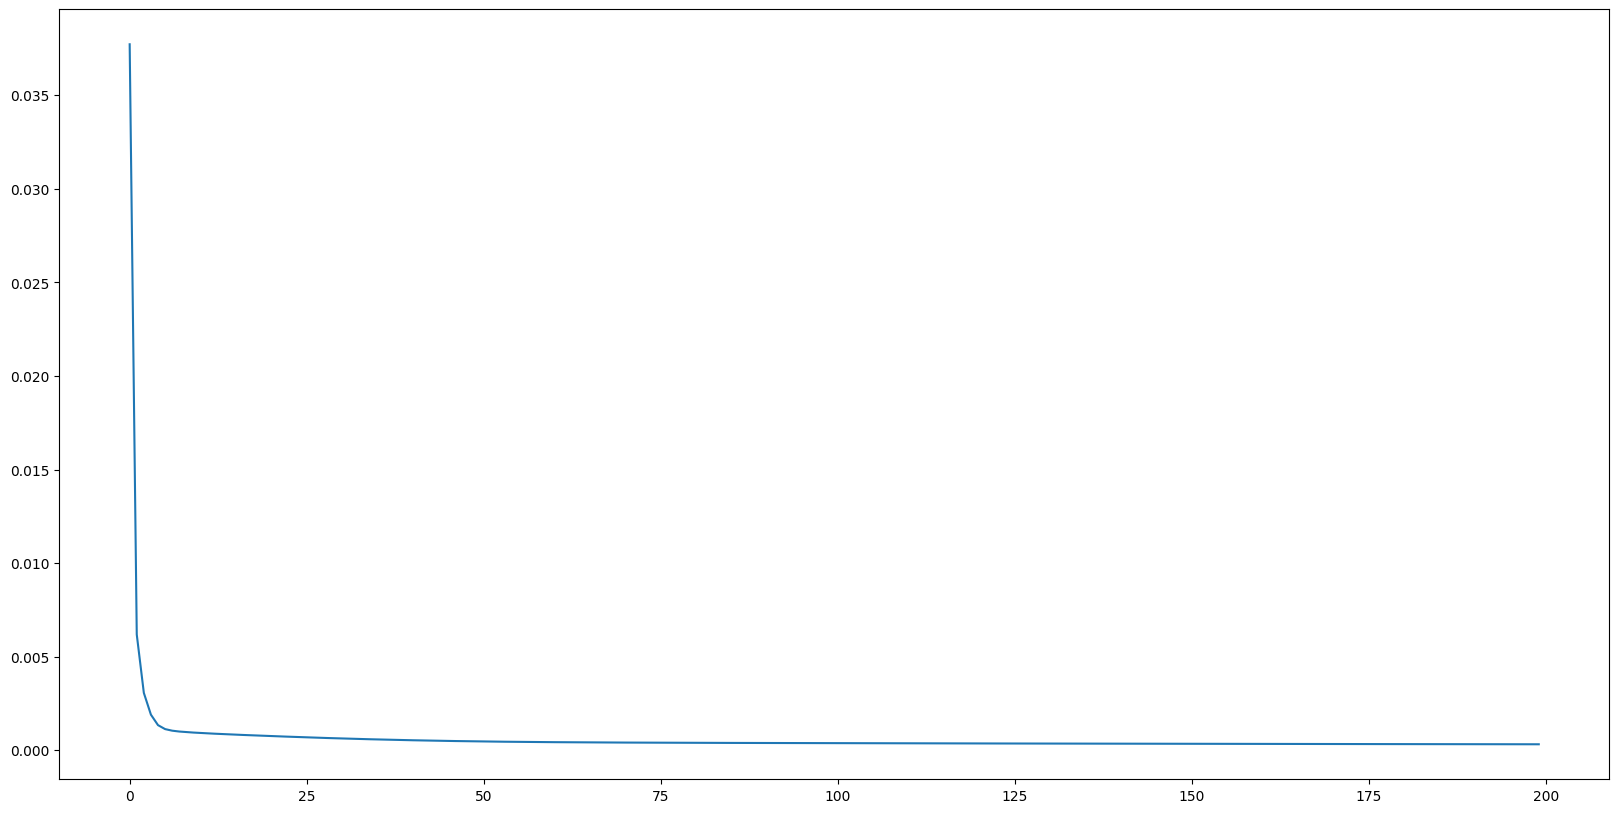

In [80]:
plt.figure(figsize=(20, 10))
plt.plot(loss_graph)
plt.show()

# Test

In [87]:
# concatdata = torch.utils.data.ConcatDataset([train_DS, test_DS])
data_loader = DataLoader(dataset=train_DS, batch_size = batch_size)


model.eval()
with torch.no_grad():
    pred_train = []
    for data in data_loader:
        seq, target = data[0].to(device), data[1].to(device)
        target = target[int(len(target)*0.5):]
        seq1 = seq[int(len(seq)*0.5):]
        seq2 = seq[:int(len(seq)*0.5)]
        
        
        out = model(seq1, seq2)
        pred_train += out.cpu().tolist()

C:\Users\AML2\AppData\Local\Temp\ipykernel_23456\528308746.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  enc_hid = torch.tensor(enc_hid)


In [89]:
print(len(pred_train))

33730


In [88]:
# concatdata = torch.utils.data.ConcatDataset([train_DS, test_DS])
data_loader = DataLoader(dataset=test_DS, batch_size = batch_size)


model.eval()
with torch.no_grad():
    pred_test = []
    for data in data_loader:
        seq, target = data[0].to(device), data[1].to(device)
        target = target[int(len(target)*0.5):]
        seq1 = seq[int(len(seq)*0.5):]
        seq2 = seq[:int(len(seq)*0.5)]
        
        
        out = model(seq1, seq2)
        pred_test += out.cpu().tolist()

C:\Users\AML2\AppData\Local\Temp\ipykernel_23456\528308746.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  enc_hid = torch.tensor(enc_hid)


In [90]:
print(len(pred_test)) # 내부로 들어가서 반만 이용하는 모델의 방식 때문에 뒷부분 반만 출력값이 존재

14456


# Evaluation

In [94]:
print("Attention_Model_Evaluation")

print("r2_score(train):", r2_score(y1_train, pred_train))
#print("r2_score(test):", r2_score(y_test, pred[int(len(pred)*0.4):]))

print("mae(train):", mean_absolute_error(y1_train, pred_train))
#print("mae(test):", mean_absolute_error(y_test, pred[int(len(pred)*0.4):] ))

print("rmse(train):", mean_squared_error(y1_train, pred_train)**0.5)
#print("rmse(test):", mean_squared_error(y_test, pred[int(len(pred)*0.4):] )**0.5)

Attention_Model_Evaluation
r2_score(train): -0.5724751545435529
mae(train): 0.21511078332657127
rmse(train): 0.26849450902551614


In [95]:
# with open('Attention_0.pkl', 'wb')as file:
#     pickle.dump(model, file)
    
# with open('Attention_0.pkl', 'rb')as file:
#     Attention_0=pickle.load(file)
    

print("Attention_Model_Evaluation")

# print("r2_score(train):", r2_score(y_train, pred[:int(len(pred)*0.7)]))
print("r2_score(test):", r2_score(y1_test, pred_test))

# print("mae(train):", mean_absolute_error(y_train, pred[:int(len(y_seq)*0.7)]))
print("mae(test):", mean_absolute_error(y1_test, pred_test))

# print("rmse(train):", mean_squared_error(y_train, pred[:int(len(y_seq)*0.7)] )**0.5)
print("rmse(test):", mean_squared_error(y1_test, pred_test))

Attention_Model_Evaluation
r2_score(test): -1.0186449802209472
mae(test): 0.16062211840788204
rmse(test): 0.04379133810466186
